# K-Means: House grouping system

# All Imports

In [84]:
import pandas as pd
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


import seaborn as sns
from pickle import dump

# Import Data

In [85]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [86]:
total_data.drop(columns= set(total_data.columns) - set(["MedInc", "Latitude", "Longitude"]), inplace=True)
total_data.head() # para borrar todo menos las variables que quiero

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


# Build KMeans

In [87]:
X_train, x_test = train_test_split(total_data, random_state=42, test_size=0.2)

In [88]:
model = KMeans(n_clusters=6)

In [89]:
model.fit(X_train)

# número de clústeres
print('\nNúmero predeterminado de clústeres:', model.n_clusters)

#lista de labels
print('\nLista de Labels:', model.labels_)

y_train = model.labels_

X_train['cluster'] = y_train

X_train.head()




Número predeterminado de clústeres: 6

Lista de Labels: [1 2 2 ... 1 3 0]


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,1
8267,3.8125,33.77,-118.16,2
17445,4.1563,34.66,-120.48,2
14265,1.9425,32.69,-117.11,1
2271,3.5542,36.78,-119.80,0


In [90]:
predict_test = model.predict(x_test)  
print('Clústeres en los datos de prueba:', predict_test)  

x_test['cluster'] = predict_test

x_test.head()


Clústeres en los datos de prueba: [1 1 3 ... 5 0 1]


,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,1
3024,2.5313,35.14,-119.46,1
15663,3.4801,37.80,-122.44,3
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,3


## Plotting clusters

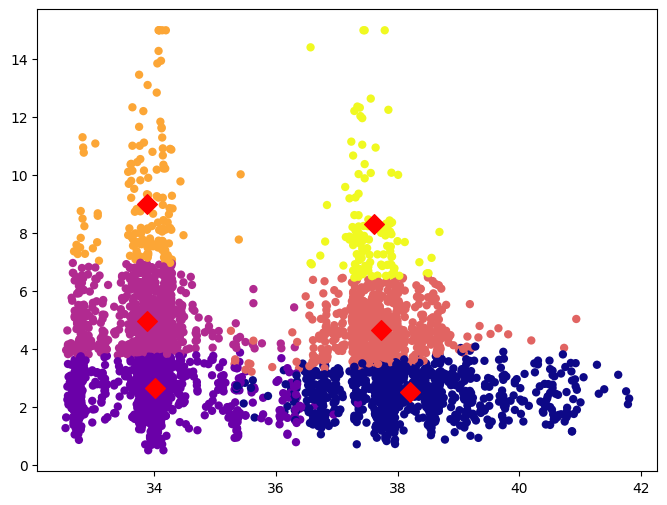

In [91]:
def plot_clustering(data, clusters, centroids=None):
    plt.figure(figsize=(8, 6))  # Cambiar el tamaño de la figura para que sea más alta que ancha
    plt.scatter(data[:, 1], data[:, 0], c=clusters, cmap='plasma', linewidths=0)  # Intercambiar los ejes x e y
    if centroids is not None:  
        for k in range(len(centroids)):
            plt.scatter(centroids[k, 1], centroids[k, 0], s=100, marker='D', color='red')  # Intercambiar los ejes x e y para los centroides
    plt.show()

plot_clustering(x_test.values, predict_test, centroids=model.cluster_centers_)



# PCA

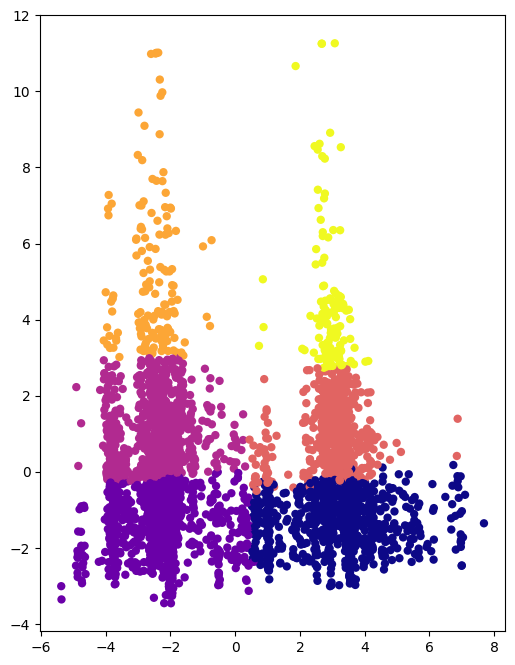

In [92]:
def plot_clustering(data, clusters, centroids=None):
    plt.figure(figsize=(6, 8))  
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='plasma', linewidths=0)  
    if centroids is not None:  
        for k in range(len(centroids)):
            plt.scatter(centroids[k, 0], centroids[k, 1], s=100, marker='D', color='red')  
    plt.show()

model_pca = PCA(n_components=2)
new_train = model_pca.fit_transform(X_train.drop(columns=['cluster']))
new_test = model_pca.transform(x_test.drop(columns=['cluster']))

plot_clustering(new_test, predict_test)



## Model Classifier

In [93]:
lr = LogisticRegression(multi_class='multinomial')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_jobs=2)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors= 10)
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=5)
xgboost = xgb.XGBClassifier(objective='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

In [94]:
#Logistic Regression
start_time = timeit.default_timer()
lr.fit(X_train, X_train['cluster'])
print("LR Training Elapsed time: ", timeit.default_timer() - start_time)

LR Training Elapsed time:  0.4567597059999571


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
#Decision Tree
start_time = timeit.default_timer()
dt.fit(X_train, X_train['cluster'])
print("DT Training Elapsed time: ", timeit.default_timer() - start_time)

DT Training Elapsed time:  0.021802769000260014


In [96]:
#Random Forest
start_time = timeit.default_timer()
rf.fit(X_train, X_train['cluster'])
print("RandomForest Training Elapsed time: ", timeit.default_timer() - start_time)

RandomForest Training Elapsed time:  0.5950231080000776


In [97]:
# SVM
start_time = timeit.default_timer()
svm.fit(X_train, X_train['cluster'])
print("SVM Training Elapsed time: ", timeit.default_timer() - start_time)

SVM Training Elapsed time:  4.296822849999899


In [98]:
#knn
start_time = timeit.default_timer()
knn.fit(X_train, X_train['cluster'])
print("Knn Training Elapsed time: ", timeit.default_timer() - start_time)

Knn Training Elapsed time:  0.012455279999812774


In [99]:
#gbm
start_time = timeit.default_timer()
gbm.fit(X_train, X_train['cluster'])
print("gbm Training Elapsed time: ", timeit.default_timer() - start_time)

gbm Training Elapsed time:  10.004739656999845


In [100]:
#xboost
start_time = timeit.default_timer()
xgboost.fit(X_train, X_train['cluster'])
print("xboost Training Elapsed time: ", timeit.default_timer() - start_time)

xboost Training Elapsed time:  0.4333569020000141


In [101]:
models = [lr, dt, rf, svm, knn, gbm, xgboost]

max_f1 = 0
min_gap = 1
best_model = None

for m in models:
    predict_train = m.predict(X_train)
    f1_score_train = f1_score(X_train['cluster'], predict_train, average="macro")
    
    predict_test_m = m.predict(x_test)
    f1_score_test = f1_score(x_test['cluster'], predict_test_m, average="macro")

    if f1_score_test > max_f1:
        if min_gap > abs(f1_score_train - f1_score_test):
            min_gap = abs(f1_score_train - f1_score_test)
            max_f1 = f1_score_test
            best_model = m


In [102]:
print('\nBest Model is: ', type(best_model).__name__)


Best Model is:  DecisionTreeClassifier


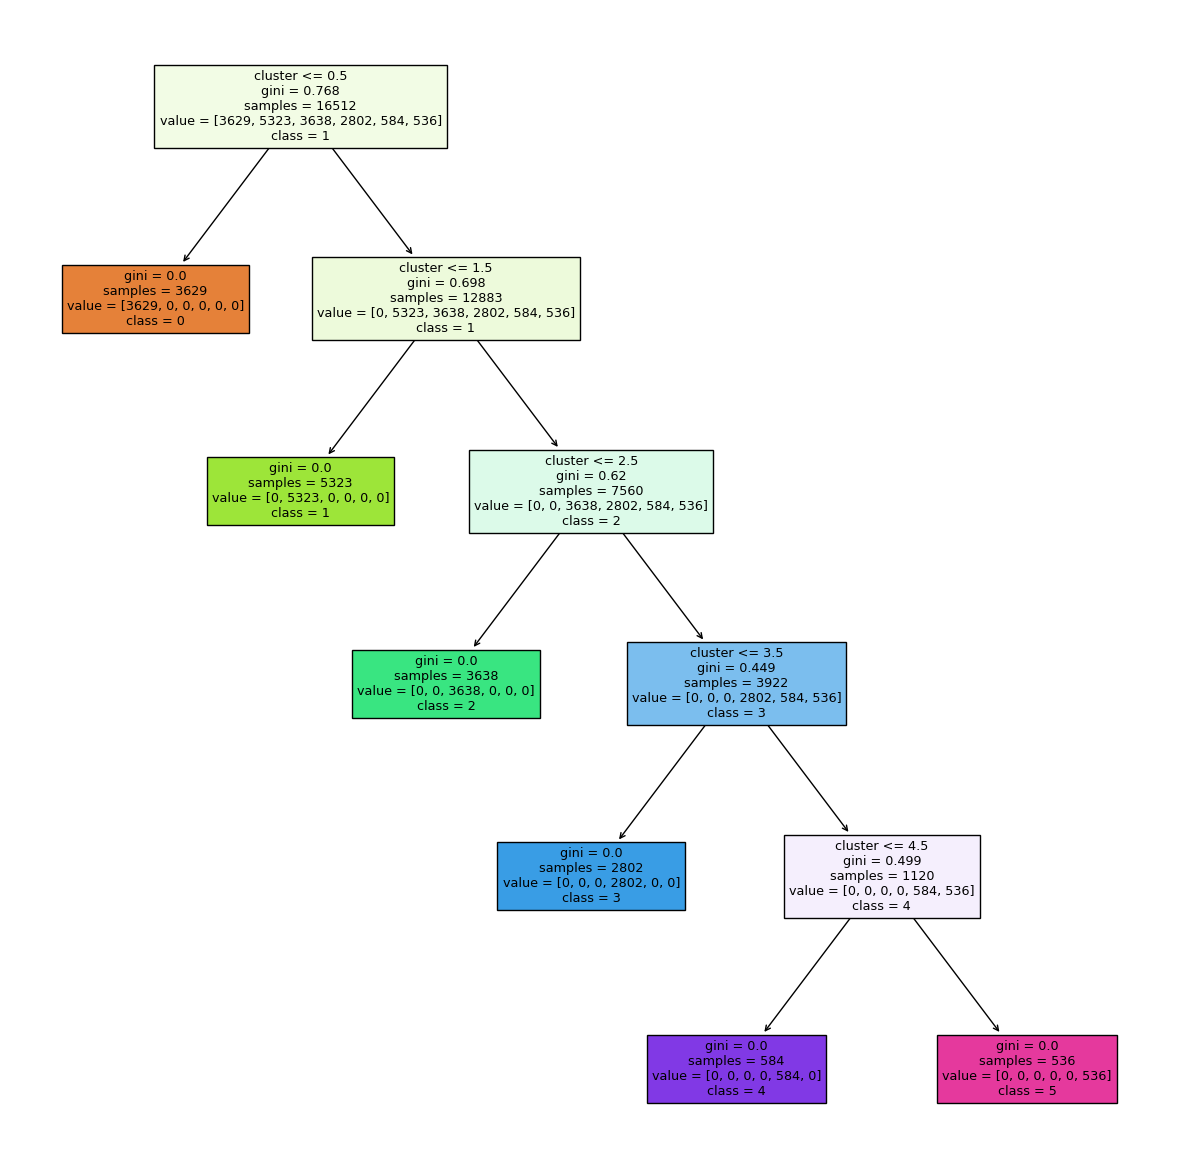

In [103]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(dt, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

# Save Model

In [104]:
from pickle import dump

dump(best_model, open("/workspaces/K-means-Project-Tutorial/dt_models.sav", "wb"))